In [20]:
import numpy as np
import pandas as pd
import utils
import seaborn as sn
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('data/results.csv', index_col=0)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,MAX_SCORE,WINNER,CONFLICT
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,5.0,46.0,36.0,39.0,32.0,45.0,46.0,EXT,False
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,3.0,20.0,35.0,40.0,37.0,35.0,40.0,AGR,False
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,4.0,25.0,34.0,40.0,34.0,41.0,41.0,OPN,False
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3.0,3.0,26.0,31.0,38.0,25.0,39.0,39.0,OPN,False
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,5.0,29.0,41.0,42.0,48.0,48.0,48.0,CSN,True


In [22]:
data.corr()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN8,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,MAX_SCORE,CONFLICT
EXT1,1.000000,-0.439143,0.464780,-0.486624,0.478108,-0.323412,0.581620,-0.368110,0.470591,-0.410360,...,0.017119,-0.064358,0.167109,0.715521,0.112464,0.184496,0.021448,0.085887,0.159158,0.045276
EXT2,-0.439143,1.000000,-0.412251,0.552499,-0.500491,0.541673,-0.444508,0.397680,-0.364016,0.490731,...,-0.016648,0.080884,-0.106274,-0.732577,-0.081726,-0.230503,0.006915,-0.064963,-0.205398,-0.035287
EXT3,0.464780,-0.412251,1.000000,-0.433411,0.554499,-0.321965,0.540904,-0.291680,0.422351,-0.433799,...,-0.026945,-0.040645,0.138937,0.691127,0.296221,0.363622,0.156523,0.079077,0.221531,0.065815
EXT4,-0.486624,0.552499,-0.433411,1.000000,-0.459694,0.457623,-0.465656,0.488620,-0.434476,0.538349,...,0.014464,0.139379,-0.079174,-0.754044,-0.199586,-0.177835,-0.049070,-0.036075,-0.212128,-0.042191
EXT5,0.478108,-0.500491,0.554499,-0.459694,1.000000,-0.409689,0.588749,-0.312217,0.421641,-0.486914,...,0.058232,0.026833,0.208553,0.742328,0.138442,0.320448,0.118236,0.159470,0.246090,0.049763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGR,0.184496,-0.230503,0.363622,-0.177835,0.320448,-0.235741,0.269932,-0.056526,0.096002,-0.176109,...,-0.047214,0.142149,0.105399,0.299364,0.081967,1.000000,0.156207,0.119826,0.314026,0.059168
CSN,0.021448,0.006915,0.156523,-0.049070,0.118236,-0.051824,0.066252,0.051299,-0.005573,-0.052752,...,-0.012733,0.062798,0.059286,0.063277,0.218315,0.156207,1.000000,0.083673,0.301682,0.058516
OPN,0.085887,-0.064963,0.079077,-0.036075,0.159470,-0.250227,0.107668,-0.043096,0.185231,-0.037868,...,0.620872,0.481004,0.693911,0.149271,0.052662,0.119826,0.083673,1.000000,0.655440,-0.027340
MAX_SCORE,0.159158,-0.205398,0.221531,-0.212128,0.246090,-0.360543,0.201940,-0.150120,0.191983,-0.227610,...,0.363403,0.262415,0.447402,0.308512,0.258914,0.314026,0.301682,0.655440,1.000000,-0.147629


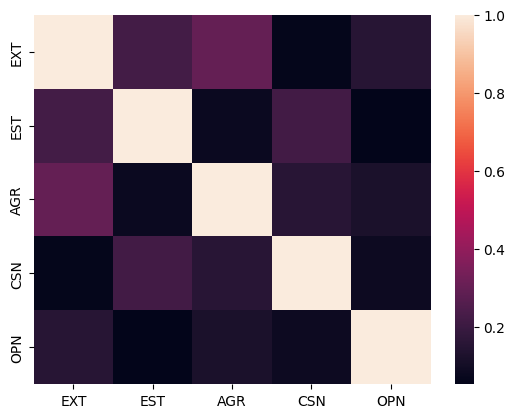

In [23]:
sn.heatmap(data.iloc[: , 100:105].corr())
plt.show()

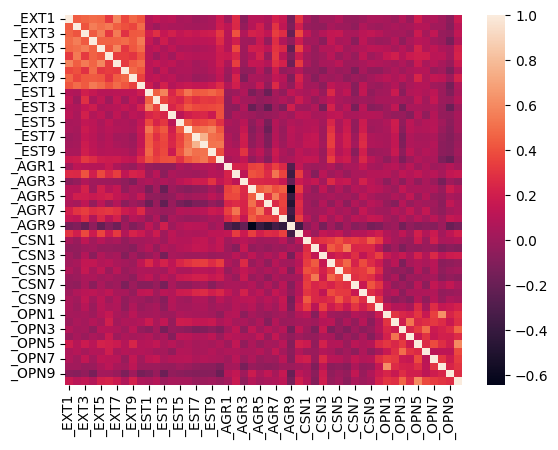

In [24]:
sn.heatmap(data.iloc[: , 50:100].corr())
plt.show()

In [25]:
data[data['CONFLICT']==True].iloc[:10, 100:106]

,EXT,EST,AGR,CSN,OPN,MAX_SCORE
4,29.0,41.0,42.0,48.0,48.0,48.0
14,16.0,20.0,40.0,33.0,40.0,40.0
29,30.0,17.0,41.0,42.0,42.0,42.0
42,43.0,45.0,45.0,33.0,43.0,45.0
57,36.0,36.0,34.0,34.0,34.0,36.0
72,14.0,36.0,18.0,32.0,36.0,36.0
75,20.0,37.0,41.0,33.0,41.0,41.0
94,22.0,25.0,34.0,34.0,33.0,34.0
103,37.0,31.0,35.0,38.0,38.0,38.0
124,35.0,21.0,34.0,34.0,35.0,35.0


In [26]:
multiclass=[]
for index, row in data[data['CONFLICT']==True].iloc[:, 100:106].iterrows():
        mask = [col == row['MAX_SCORE'] for col in row]
        multiclass.append(str(row[mask].iloc[:2].keys().tolist()))
    

In [27]:
from collections import Counter

In [28]:
dict(Counter(multiclass))

{"['CSN', 'OPN']": 14587,
 "['AGR', 'OPN']": 24407,
 "['EST', 'AGR']": 5760,
 "['EXT', 'EST']": 3776,
 "['EST', 'OPN']": 7289,
 "['AGR', 'CSN']": 13478,
 "['EXT', 'OPN']": 8744,
 "['EXT', 'AGR']": 8054,
 "['EST', 'CSN']": 4785,
 "['EXT', 'CSN']": 3382}

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015341 entries, 0 to 1015340
Columns: 108 entries, EXT1 to CONFLICT
dtypes: bool(1), float64(106), object(1)
memory usage: 837.6+ MB


In [30]:
data.isna().sum()

EXT1         1783
EXT2         1783
EXT3         1783
EXT4         1783
EXT5         1783
             ... 
CSN          1783
OPN          1783
MAX_SCORE    1783
WINNER          0
CONFLICT        0
Length: 108, dtype: int64

In [31]:
data.iloc[:, 106].value_counts()

OPN    419780
AGR    231404
CSN    164369
EXT    107702
EST     92086
Name: WINNER, dtype: int64

In [32]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,MAX_SCORE,WINNER,CONFLICT
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,5.0,46.0,36.0,39.0,32.0,45.0,46.0,EXT,False
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,3.0,20.0,35.0,40.0,37.0,35.0,40.0,AGR,False
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,4.0,25.0,34.0,40.0,34.0,41.0,41.0,OPN,False
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3.0,3.0,26.0,31.0,38.0,25.0,39.0,39.0,OPN,False
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,5.0,29.0,41.0,42.0,48.0,48.0,48.0,CSN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,34.0,27.0,36.0,31.0,33.0,36.0,AGR,False
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,4.0,32.0,16.0,35.0,28.0,45.0,45.0,OPN,False
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,4.0,5.0,39.0,31.0,35.0,19.0,48.0,48.0,OPN,False
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,3.0,22.0,25.0,35.0,38.0,41.0,41.0,OPN,False


In [33]:
data=data.dropna()
data.to_csv('data/results2.csv')  
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,MAX_SCORE,WINNER,CONFLICT
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,5.0,46.0,36.0,39.0,32.0,45.0,46.0,EXT,False
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,3.0,20.0,35.0,40.0,37.0,35.0,40.0,AGR,False
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,4.0,25.0,34.0,40.0,34.0,41.0,41.0,OPN,False
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3.0,3.0,26.0,31.0,38.0,25.0,39.0,39.0,OPN,False
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,5.0,29.0,41.0,42.0,48.0,48.0,48.0,CSN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,34.0,27.0,36.0,31.0,33.0,36.0,AGR,False
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,4.0,32.0,16.0,35.0,28.0,45.0,45.0,OPN,False
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,4.0,5.0,39.0,31.0,35.0,19.0,48.0,48.0,OPN,False
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,3.0,22.0,25.0,35.0,38.0,41.0,41.0,OPN,False


In [34]:
multiclass=[]
for index, row in data[data['CONFLICT']==True].iloc[:, 100:106].iterrows():
        mask = [col == row['MAX_SCORE'] for col in row]
        multiclass.append(str(row[mask].iloc[:2].keys().tolist()))
        
dict(Counter(multiclass))

{"['CSN', 'OPN']": 14587,
 "['AGR', 'OPN']": 24407,
 "['EST', 'AGR']": 5760,
 "['EXT', 'EST']": 3776,
 "['EST', 'OPN']": 7289,
 "['AGR', 'CSN']": 13478,
 "['EXT', 'OPN']": 8744,
 "['EXT', 'AGR']": 8054,
 "['EST', 'CSN']": 4785,
 "['EXT', 'CSN']": 3382}

In [35]:
data.isna().sum()

EXT1         0
EXT2         0
EXT3         0
EXT4         0
EXT5         0
            ..
CSN          0
OPN          0
MAX_SCORE    0
WINNER       0
CONFLICT     0
Length: 108, dtype: int64

In [36]:
data.iloc[:, 106].value_counts()

OPN    419780
AGR    231404
CSN    164369
EXT    105919
EST     92086
Name: WINNER, dtype: int64

In [37]:
data = data.drop(data[data['CONFLICT']==True].index)
data.to_csv('data/results3.csv')  
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,MAX_SCORE,WINNER,CONFLICT
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,5.0,46.0,36.0,39.0,32.0,45.0,46.0,EXT,False
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,3.0,20.0,35.0,40.0,37.0,35.0,40.0,AGR,False
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,4.0,25.0,34.0,40.0,34.0,41.0,41.0,OPN,False
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3.0,3.0,26.0,31.0,38.0,25.0,39.0,39.0,OPN,False
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,2.0,32.0,38.0,36.0,37.0,44.0,44.0,OPN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,34.0,27.0,36.0,31.0,33.0,36.0,AGR,False
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,4.0,32.0,16.0,35.0,28.0,45.0,45.0,OPN,False
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,4.0,5.0,39.0,31.0,35.0,19.0,48.0,48.0,OPN,False
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,3.0,22.0,25.0,35.0,38.0,41.0,41.0,OPN,False


In [39]:
data.iloc[1]

EXT1           3.0
EXT2           5.0
EXT3           3.0
EXT4           4.0
EXT5           3.0
             ...  
CSN           37.0
OPN           35.0
MAX_SCORE     40.0
WINNER         AGR
CONFLICT     False
Name: 1, Length: 108, dtype: object

In [40]:
data = data.drop_duplicates()
data.to_csv('data/results4.csv')  
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,MAX_SCORE,WINNER,CONFLICT
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4.0,5.0,46.0,36.0,39.0,32.0,45.0,46.0,EXT,False
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,3.0,20.0,35.0,40.0,37.0,35.0,40.0,AGR,False
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,4.0,25.0,34.0,40.0,34.0,41.0,41.0,OPN,False
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3.0,3.0,26.0,31.0,38.0,25.0,39.0,39.0,OPN,False
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,2.0,32.0,38.0,36.0,37.0,44.0,44.0,OPN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,34.0,27.0,36.0,31.0,33.0,36.0,AGR,False
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,4.0,32.0,16.0,35.0,28.0,45.0,45.0,OPN,False
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,4.0,5.0,39.0,31.0,35.0,19.0,48.0,48.0,OPN,False
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,3.0,22.0,25.0,35.0,38.0,41.0,41.0,OPN,False
